In [54]:
from scipy.sparse import *
import numpy as np
import pickle
import random
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm

In [26]:
# load vocabulary
with open('vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)
list(vocab.items())[:10]

[('sees', 3527),
 ('secure', 5560),
 ('lasagna', 15587),
 ('bakes', 20780),
 ('daz', 20398),
 ('yer', 4042),
 ('handing', 13230),
 ('#madeinchelsea', 19624),
 ('mana', 13086),
 ('replies', 4525)]

In [ ]:
# construct num -> word dict
reverse_dictionary = dict(zip(vocab.values(), vocab.keys()))

In [27]:
# load cooccurence matrix
with open('cooc.pkl', 'rb') as f:
    cooc = pickle.load(f)
cooc.shape

(21161, 21161)

In [28]:
# load embeddings
embeddings = np.load('embeddings.npy')
embeddings.shape

(21161, 20)

In [52]:
# do PCA on embeddings
pca = PCA(n_components=2, svd_solver='arpack').fit_transform(embeddings)
pca.shape

(21161, 2)

In [59]:
np.random.choice([1,2,3], 2)

array([3, 1])

100%|██████████| 2116/2116 [00:00<00:00, 15550.06it/s]


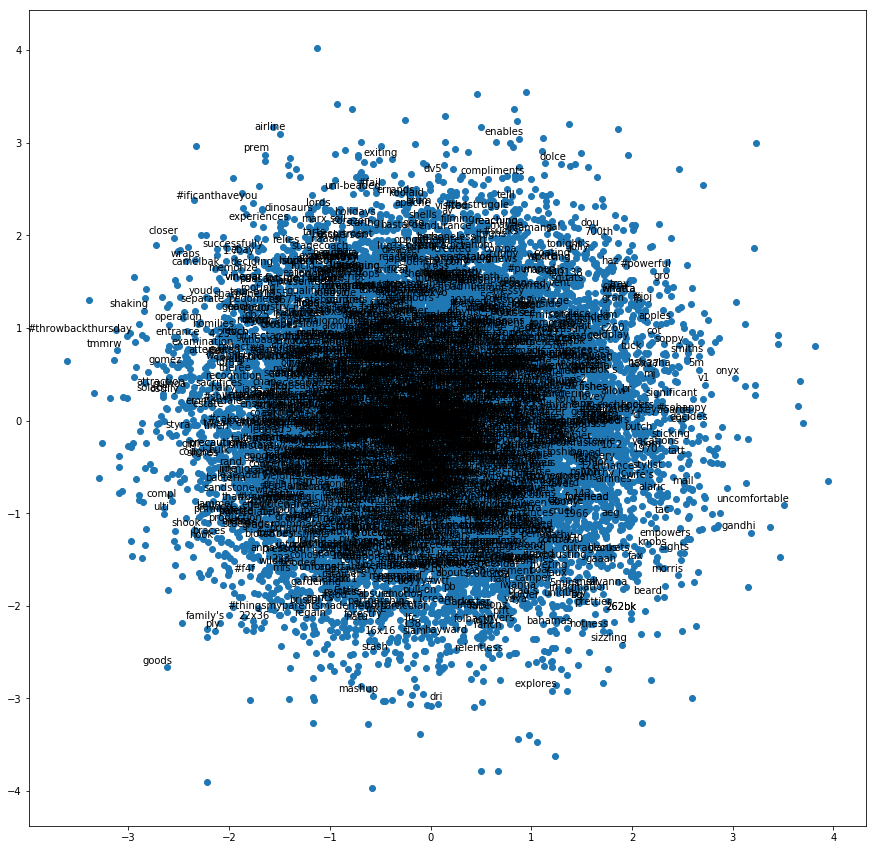

In [65]:
# plot pca
def plot(pca, labels, p = 0.1):
    assert pca.shape[0] == len(labels), 'Labels are not from these embeddings'
    assert pca.shape[1] == 2
    plt.figure(figsize=(15, 15))  # in inches
    plt.scatter(pca[:, 0], pca[:, 1])
    
    labels_subset = np.random.choice(labels, int(len(labels) * p))
    
    for label in tqdm(labels_subset):
        i = vocab[label]
        x, y = pca[i, :]
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

words = list(vocab.keys())
plot(pca, words)

In [67]:
# load data


In [111]:
def file_to_word2numbers(filename):
    data = open(filename, 'rb')
    word2numbers_all = []
    for line in tqdm(data):
        line = line.strip().decode("utf-8").split(' ')
        word2numbers = []
        for word in line:
            if word in vocab: word2numbers.append(vocab[word])
        if word2numbers:
            word2numbers_all.append(word2numbers)
    return word2numbers_all

In [125]:
pos_numbers = file_to_word2numbers('pos_train.txt')
neg_numbers = file_to_word2numbers('neg_train.txt')

100000it [00:00, 100122.53it/s]
100000it [00:01, 86036.03it/s]


In [127]:
def numbers_to_dataset(numbers):
    tweets_embeddings = np.zeros((len(numbers), embeddings.shape[1]))
    for i, tweet in enumerate(numbers):
        tweets_embeddings[i, :] = np.mean(embeddings[tweet, :], axis = 0)
    return tweets_embeddings

In [128]:
pos_data = numbers_to_dataset(pos_numbers)
neg_data = numbers_to_dataset(neg_numbers)

In [136]:
def two_datasets_to_one(pos_data, neg_data):
    assert pos_data.shape[1] == neg_data.shape[1]
    X = np.vstack((pos_data, neg_data))
    y = np.array([1] * pos_data.shape[0] + [0] * neg_data.shape[0])
    assert len(y) == X.shape[0]
    assert X.shape[0] == pos_data.shape[0] + neg_data.shape[0]
    assert X.shape[1] == pos_data.shape[1]
    return X, y

In [138]:
X, y = two_datasets_to_one(pos_data, neg_data)

In [140]:
y

array([1, 1, 1, ..., 0, 0, 0])